# Embedded ML - Lab 2.1: TensorFlow

In this lab you will learn the basics of one of the most developed and widely used ML libraries: TensorFlow. It implements many of the most important ML models and algorithms and has optimized back-ends for efficient execution on CPUs, GPUs, TPUs and other devices.

In this lab you are given some helper functions but you are expected to write most of the code and be able to explain it at a high level of abstraction and also to modify any part of it. This lab is important because a significant part of the course will use TensorFlow.

### Learning outcomes


* Explain the basic concepts associated with TensorFlow
* Use the basic workflow of TensorFlow to build a simple ML model
* Implement simple dense networks with TensorFlow and Keras
* Use some of the input handling functions of TensorFlow
* Implement a simple CNN with TensorFlow and Keras
* Implement transfer learning and fine tuning.

In [89]:
# To run this notebook, locally as a jupyter notebook, you need to install the following packages:

#1. Create a virtual environment through conda or venv
#   For example, using conda:
#                conda create -n [myenv] python=3.8
#                conda activate [myenv]
#   Or using venv:
#                python3 -m venv [myenv]
#                source [myenv]/bin/activate
#
#
#2. Activate the virtual environment
#3. Install the required packages using pip
#4. Run the notebook


# Install the required packages
%pip install numpy -q
%pip install matplotlib -q
%pip install tensorflow -q
%pip install scikit-learn -q
%pip install tensorflow-hub -q 
%pip install tensorflow-datasets -q
%pip install kagglehub -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### TensorFlow workflow
As in general with ML, in TensorFlow you have to get or preprocess the model inputs, train the model, run inference and evaluate results.

Here you should use TensorFlow to build a dense 4-layer network to classify items in the FASHION MNIST dataset. Explore a few different hidden-layer sizes and report the accuracy achieved.

Finally, investigate how to export the model to a file and write a separate code that is able to load that model and run inference again.

In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create the model
def create_model(
    hidden_layer1 :int = 128,
    hidden_layer2 :int = 128,
    hidden_layer3 :int = 128,
    learning_rate :float = 0.001
    ):

    """
    Create a simple feedforward neural network model using Keras.
    Args:
        hidden_layer1 (int): Number of neurons in the first hidden layer.
        hidden_layer2 (int): Number of neurons in the second hidden layer.
        hidden_layer3 (int): Number of neurons in the third hidden layer.
        learning_rate (float): Learning rate for the optimizer.

    Returns:
        model (keras.Model): Compiled Keras model.
    """

    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(hidden_layer1, activation='relu'),
        keras.layers.Dense(hidden_layer2, activation='relu'),
        keras.layers.Dense(hidden_layer3, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model



# Train the model
model = create_model()
model.summary()
model.fit(train_images, train_labels, epochs=5)


# Evaluate functional performance
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)




/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7040 - loss: 3.2886
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8073 - loss: 0.5537
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8305 - loss: 0.4743
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8484 - loss: 0.4251
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.3952
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8551 - loss: 0.4025

Test accuracy: 0.8518000245094299


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


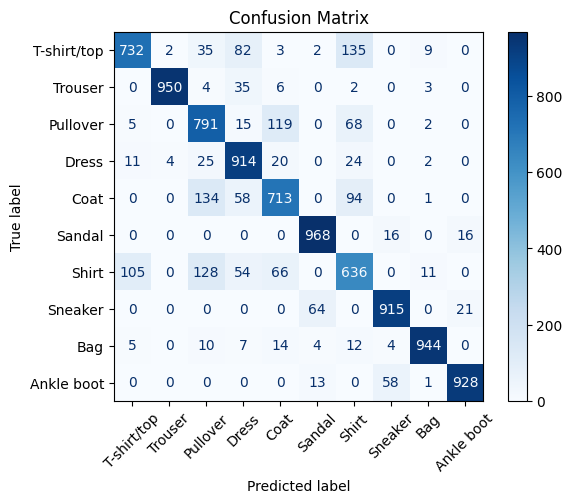

In [23]:
# confusion matrix
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                                            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
                            )

disp.plot(cmap= 'Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [30]:
# Save the model to a file
def save_model(model, model_name: str = 'fashion_mnist_model'):
    """
    Save the Keras model to a folder to be deployed in TFLite and the weights in .h5 format to re use in python.
    Args:
        model (keras.Model): Keras model to be saved.
        model_name (str): Name of the file to save the model.
    """

    model.export(model_name)
    # Save the model in HDF5 format
    model.save_weights(model_name + '.weights.h5')

    print(f"Model saved as {model_name}")


# Save the model
save_model(model)


INFO:tensorflow:Assets written to: fashion_mnist_model/assets


INFO:tensorflow:Assets written to: fashion_mnist_model/assets


Saved artifact at 'fashion_mnist_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_30')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135788129459408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129462672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129463056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129463632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129463248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129464592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129464208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788129465360: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as fashion_mnist_model


In [33]:
# Instantiate model
models = {}
models_performance = {}

arquitecture = [
    (128, 256, 64, 0.001),
    (64, 128, 256, 0.001),
    (256, 64, 128, 0.001),
    (128, 64, 32, 0.001),
    (64, 64, 32, 0.001),
    (32, 64, 32, 0.001),
    (32, 64, 32, 0.001),
    (256, 256, 256, 0.001)

]

for i in range(1, len(arquitecture)+1):

    models[f'modelo_{i}'] = create_model(
        hidden_layer1=arquitecture[i-1][0],
        hidden_layer2=arquitecture[i-1][1],
        hidden_layer3=arquitecture[i-1][2],
        learning_rate=arquitecture[i-1][3]
        )

    models[f'modelo_{i}'].summary()
    models[f'modelo_{i}'].fit(train_images, train_labels, epochs=5)
    test_loss, test_acc = models[f'modelo_{i}'].evaluate(test_images, test_labels)
    models_performance[f'modelo_{i}'] = (test_loss, test_acc)




Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,602 (588.29 KB)

 Trainable params: 150,602 (588.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6822 - loss: 2.4602
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8219 - loss: 0.5166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8381 - loss: 0.4562
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8546 - loss: 0.4128
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8621 - loss: 0.3889
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.4180
test_loss:  0.4217463433742523 test_acc:  0.8575000166893005


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6715 - loss: 2.1892
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8086 - loss: 0.5486
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8321 - loss: 0.4732
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8459 - loss: 0.4375
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8510 - loss: 0.4230
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8502 - loss: 0.4277
test_loss:  0.44672685861587524 test_acc:  0.8428000211715698


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,018 (886.79 KB)

 Trainable params: 227,018 (886.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6971 - loss: 3.1255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8012 - loss: 0.5735
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8191 - loss: 0.5218
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8373 - loss: 0.4698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8504 - loss: 0.4236
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8389 - loss: 0.4601
test_loss:  0.4699454605579376 test_acc:  0.8363000154495239


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7010 - loss: 3.7188
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8269 - loss: 0.5124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8416 - loss: 0.4507
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8533 - loss: 0.4193
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8607 - loss: 0.3893
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3954
test_loss:  0.40456560254096985 test_acc:  0.8526999950408936


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6058 - loss: 3.3875
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7684 - loss: 0.6412
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7980 - loss: 0.5573
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8185 - loss: 0.5013
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8296 - loss: 0.4706
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8216 - loss: 0.5033
test_loss:  0.5162771344184875 test_acc:  0.8177000284194946


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4441 - loss: 2.3979
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6347 - loss: 0.9155
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7307 - loss: 0.6743
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7730 - loss: 0.5747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8238 - loss: 0.4992
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8090 - loss: 0.5653
test_loss:  0.5758811235427856 test_acc:  0.8062999844551086


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,642 (115.79 KB)

 Trainable params: 29,642 (115.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4539 - loss: 3.2824
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6417 - loss: 0.9236
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7215 - loss: 0.7478
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7594 - loss: 0.6182
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7742 - loss: 0.5751
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7906 - loss: 0.5654
test_loss:  0.5734127163887024 test_acc:  0.789900004863739


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7222 - loss: 3.7951
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8186 - loss: 0.5123
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8413 - loss: 0.4457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8523 - loss: 0.4141
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8620 - loss: 0.3797
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8325 - loss: 0.4487
test_loss:  0.447727233171463 test_acc:  0.8320000171661377


modelo_1: test_loss: 0.4217463433742523, test_acc: 0.8575000166893005
modelo_2: test_loss: 0.44672685861587524, test_acc: 0.8428000211715698
modelo_3: test_loss: 0.4699454605579376, test_acc: 0.8363000154495239
modelo_4: test_loss: 0.40456560254096985, test_acc: 0.8526999950408936
modelo_5: test_loss: 0.5162771344184875, test_acc: 0.8177000284194946
modelo_6: test_loss: 0.5758811235427856, test_acc: 0.8062999844551086
modelo_7: test_loss: 0.5734127163887024, test_acc: 0.789900004863739
modelo_8: test_loss: 0.447727233171463, test_acc: 0.8320000171661377


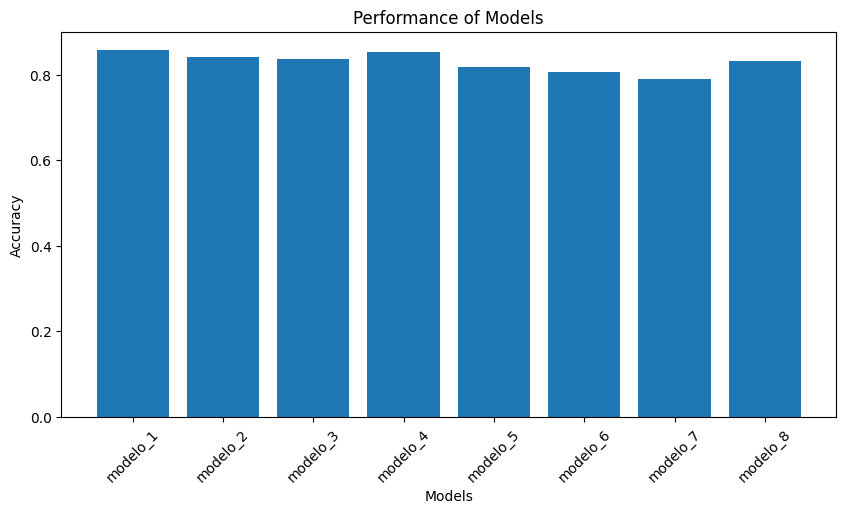

In [34]:
for key, value in models_performance.items():
    print(f"{key}: test_loss: {value[0]}, test_acc: {value[1]}")

# plot the performance of the models
def plot_performance(models_performance):
    """
    Plot the performance of the models.
    Args:
        models_performance (dict): Dictionary containing the performance of the models.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(models_performance.keys(), [value[1] for value in models_performance.values()])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Performance of Models')
    plt.xticks(rotation=45)
    plt.show()

# Plot the performance of the models
plot_performance(models_performance)

In [36]:
# Load the saved model
new_model = create_model()
new_model.load_weights('fashion_mnist_model.weights.h5')

new_model.summary()


# Verify functional performance
test_loss, test_acc = new_model.evaluate(test_images, test_labels)
print("test lost: ", test_loss, "\ntest acc: ", test_acc)

/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8505 - loss: 0.4218
test lost:  0.4345336854457855 
test acc:  0.8481000065803528


### CNNs with TensorFlow
Convolutional Neural Networks add another type of processing layers to extract image features that allow the model to indentify patterns for a much better accuracy results in computer vision applications.

Implement a CNN model to classify the FASHION MNIST dataset and compare the accuracy results with the previous dense model. Also report a comparison of the model size measuring the saved model file size and through an analytical estimation.

In [41]:
# Pre-process input dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

# Create the CNN model
model_conv = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
model_conv.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_conv.summary()

# Train the model
model_conv.fit(train_images, train_labels, epochs=10)

# Evaluate functional performance
test_loss, test_acc = model_conv.evaluate(test_images, test_labels)
print("test_loss: ", test_loss, "\ntest_acc: ", test_acc)

# Save the model to a file
save_model(model_conv, 'fashion_mnist_model_conv')


/home/julian-sanchez/Universidad/Embedded-Machine-Learning/Lab2/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 281,290 (1.07 MB)

 Trainable params: 281,290 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7840 - loss: 0.5959
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8916 - loss: 0.2981
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9102 - loss: 0.2472
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9228 - loss: 0.2060
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9302 - loss: 0.1818
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9406 - loss: 0.1597
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9481 - loss: 0.1381
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9527 - loss: 0.1222
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9595 - loss: 0.1070
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9660 - loss: 0.0912
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9126 - loss: 0.3202
test_loss:  0.317444860

INFO:tensorflow:Assets written to: fashion_mnist_model_conv/assets


Saved artifact at 'fashion_mnist_model_conv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_132')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  135788106242896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106243856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106245776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106245392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106244432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106243472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106243088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135788106239248: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved as fashion_mnist_model_conv


In [49]:
def calculate_operations(layer):
    try:
        input_shape = layer.input.shape
        output_shape = layer.output.shape

        if isinstance(layer, tf.keras.layers.Conv2D):

            _, _, _, in_c = input_shape
            _, out_h, out_w, out_c = output_shape
            k_h, k_w = layer.kernel_size

            return int(out_h * out_w * k_h * k_w * in_c * out_c)

        elif isinstance(layer, tf.keras.layers.Dense):
            return int(input_shape[-1] * output_shape[-1])

        else:
            return 0

    except Exception as e:
        print(f"Error en capa {layer.name}: {e}")
        return 0

# Example usage:
total_operations_CNN = sum(calculate_operations(layer) for layer in model_conv.layers)
print(f"Total operations in CNN model: {total_operations_CNN}")
     
total_operations_FFNN = sum(calculate_operations(layer) for layer in model.layers)
print(f"Total operations in FFNN model: {total_operations_FFNN}")



Total operations in CNN model: 9905920
Total operations in FFNN model: 134400


In [52]:
def model_size(archivo1, archivo2):
    """
    Calculate the size of the model files in bytes.
    Args:
        archivo1 (str): Path to the first model file.
        archivo2 (str): Path to the second model file.

    Returns:
        size1 (int): Size of the first model file in bytes.
        size2 (int): Size of the second model file in bytes.
    """
    size1 = os.path.getsize(archivo1)
    size2 = os.path.getsize(archivo2)

    return size1, size2


# Example usage:
first_model_file = "fashion_mnist_model_conv.weights.h5"
second_model_file = 'fashion_mnist_model.weights.h5'
size1, size2 = model_size(first_model_file, second_model_file)
print(f"Size of {first_model_file} file: {size1} bytes")
print(f"Size of {second_model_file} file: {size2} bytes")

Size of fashion_mnist_model_conv.weights.h5 file: 3408200 bytes
Size of fashion_mnist_model.weights.h5 file: 1646784 bytes


### Transfer learning and fine tuning
When you want to build a model but do not have enough data or resources to train a network with the accuracy you need, it possible to use a model that has been pre-trained on a large dataset and fine tune it with the target (smaller) dataset to solve the target classification problem.

Here you should use TensorFlow and Keras to download a pre-trained vision model from TensorFlow Hub (e.g. MobileNet V2), add a softmax classification layer and train it with a small subset of the Fashion MNIST dataset.

Compare runtimes and Top-1 accuracy of the resulting model with the dense and convolutional models previously built.



In [92]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import kagglehub
from tensorflow import keras

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector")

print("Path to model files:", path)




100%|██████████| 5.15k/5.15k [00:00<00:00, 6.08MB/s]

100%|██████████| 1.10M/1.10M [00:00<00:00, 2.05MB/s]
100%|██████████| 8.65M/8.65M [00:01<00:00, 8.12MB/s]

Path to model files: /home/julian-sanchez/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4


In [87]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from tensorflow import keras

# ============================
# CONFIGURACIÓN
# ============================

BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
IMAGE_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE

# ============================
# PREPROCESAMIENTO
# ============================

def preprocess_image(image, label):
    # Expandir a (H, W, 1)
    image = tf.expand_dims(image, axis=-1)
    # Redimensionar a 224x224
    image = tf.image.resize(image, IMAGE_SIZE)
    # Convertir a RGB
    image = tf.image.grayscale_to_rgb(image)
    # Normalizar a [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# ============================
# CARGA Y PREPARACIÓN DE DATOS
# ============================

# Cargar Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Subconjuntos de datos
train_images = train_images[1500:2100]
train_labels = train_labels[1500:2100]
test_images = test_images[:1000]
test_labels = test_labels[:1000]

# Dataset base
full_train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Mezclar y dividir entrenamiento y validación
total_train = len(train_images)
val_size = int(VALIDATION_SPLIT * total_train)

train_ds = full_train_ds.skip(val_size)
val_ds = full_train_ds.take(val_size)

# Aplicar preprocesamiento, batching y optimizaciones
train_ds = (
    train_ds
    .map(preprocess_image, num_parallel_calls=AUTOTUNE)
    .shuffle(buffer_size=total_train)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
    .cache()
)

val_ds = (
    val_ds
    .map(preprocess_image, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
    .cache()
)

test_ds = (
    test_ds
    .map(preprocess_image, num_parallel_calls=AUTOTUNE)
    .batch(1)
    .prefetch(AUTOTUNE)
)

# ============================
# MODELO
# ============================

# Módulo preentrenado MobileNetV2 desde TFHub


# URL válida desde TensorFlow Hub
MODULE_HANDLE = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

# Crea el modelo secuencial
model = tf.keras.Sequential([
    hub.KerasLayer(MODULE_HANDLE, input_shape=(224, 224, 3), output_shape=[1280], trainable=False),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()



# ============================
# COMPILACIÓN Y RESUMEN
# ============================

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7b7fa0d3eb40> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)